<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Recurrent_Neural_Network_Alcohol_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importin libraries

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Data visualization

In [2]:
df = pd.read_csv('Alcohol_Sales.csv',index_col=0,parse_dates=True)

In [3]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [4]:
len(df)

325

In [5]:
df = df.dropna()

In [6]:
len(df)

325

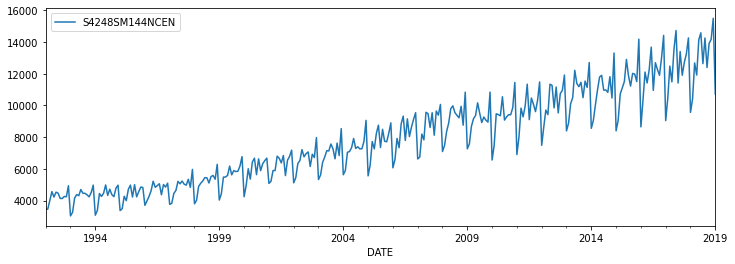

In [10]:
df.plot(figsize=(12,4))

In [11]:
y = df['S4248SM144NCEN'].values.astype(float)

In [12]:
y

array([ 3459.,  3458.,  4002.,  4564.,  4221.,  4529.,  4466.,  4137.,
        4126.,  4259.,  4240.,  4936.,  3031.,  3261.,  4160.,  4377.,
        4307.,  4696.,  4458.,  4457.,  4364.,  4236.,  4500.,  4974.,
        3075.,  3377.,  4443.,  4261.,  4460.,  4985.,  4324.,  4719.,
        4374.,  4248.,  4784.,  4971.,  3370.,  3484.,  4269.,  3994.,
        4715.,  4974.,  4223.,  5000.,  4235.,  4554.,  4851.,  4826.,
        3699.,  3983.,  4262.,  4619.,  5219.,  4836.,  4941.,  5062.,
        4365.,  5012.,  4850.,  5097.,  3758.,  3825.,  4454.,  4635.,
        5210.,  5057.,  5231.,  5034.,  4970.,  5342.,  4831.,  5965.,
        3796.,  4019.,  4898.,  5090.,  5237.,  5447.,  5435.,  5107.,
        5515.,  5583.,  5346.,  6286.,  4032.,  4435.,  5479.,  5483.,
        5587.,  6176.,  5621.,  5889.,  5828.,  5849.,  6180.,  6771.,
        4243.,  4952.,  6008.,  5353.,  6435.,  6673.,  5636.,  6630.,
        5887.,  6322.,  6520.,  6678.,  5082.,  5216.,  5893.,  5894.,
      

In [13]:
test_size = 12

Choosing test_Size as 12 is logical by looking at our data set which periodically repeat same behavior every 12 months

In [14]:
train_set = y[:-test_size]
test_set = y[-test_size:]

In [15]:
test_set

array([10415., 12683., 11919., 14138., 14583., 12640., 14257., 12396.,
       13914., 14174., 15504., 10718.])

## Normalization

In [16]:
from sklearn.preprocessing import MinMaxScaler 

In [17]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [18]:
scaler.fit(train_set.reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(-1, 1))

In [19]:
train_norm = scaler.transform(train_set.reshape(-1,1))

Changing numpy array to tensor

In [22]:
train_norm = torch.FloatTensor(train_norm).view(-1)

In [23]:
window_size = 12

## Creating function to split train label data

In [26]:
def input_data(seq,ws):
  out = []
  L = len(seq)

  for i in range(L-ws):
    window = seq[i:i+ws]
    label = seq[i+ws:i+ws+1]
    out.append((window,label))
  return out


In [27]:
train_data = input_data(train_norm,window_size)

In [28]:
len(train_data) # 325-12-12 = 301

301

In [29]:
train_data[0]

(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
         -0.8128, -0.7901, -0.7933, -0.6743]), tensor([-1.]))

## Recurrent Neural Network

In [31]:
class LSTM(nn.Module):

  def __init__(self,input_size=1,hidden_size=100,out_size=1): # hidden_size is neuron number to play around

    super().__init__()
    self.hidden_size = hidden_size
#add an lstm layer
    self.lstm = nn.LSTM(input_size,hidden_size)
#add a fully connected layer
    self.linear = nn.Linear(hidden_size,out_size)
#initializing h0 and c0:
    self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))

  def forward(self,seq):

    lstm_out,self.hidden = self.lstm(seq.view(len(seq),1,-1),self.hidden)

    pred = self.linear(lstm_out.view(len(seq),-1))

    # [1,2,3]  [4] ---> [1,2,3,4 ----> 4]
    return pred[-1]

In [32]:
torch.manual_seed(101)

model = LSTM()

## Defining cost function and optimization method

In [33]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [34]:
model

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

## Training

In [35]:
epochs = 100

import time
start_time = time.time()

for i in range(epochs):

  for seq,y_train in train_data:

    optimizer.zero_grad()

    model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))

    y_pred = model(seq)

    loss = criterion(y_pred,y_train)
    loss.backward()
    optimizer.step()

  print('Epoch: {} Loss: {}'.format(i,loss))

total_time = time.time() - start_time
print(total_time/60)

Epoch: 0 Loss: 0.25310203433036804
Epoch: 1 Loss: 0.37531977891921997
Epoch: 2 Loss: 0.3902722895145416
Epoch: 3 Loss: 0.34934675693511963
Epoch: 4 Loss: 0.3308565020561218
Epoch: 5 Loss: 0.33229967951774597
Epoch: 6 Loss: 0.3267035484313965
Epoch: 7 Loss: 0.3207412362098694
Epoch: 8 Loss: 0.3065353333950043
Epoch: 9 Loss: 0.29518038034439087
Epoch: 10 Loss: 0.2693433463573456
Epoch: 11 Loss: 0.2599843740463257
Epoch: 12 Loss: 0.24665838479995728
Epoch: 13 Loss: 0.22403840720653534
Epoch: 14 Loss: 0.18602700531482697
Epoch: 15 Loss: 0.18560989201068878
Epoch: 16 Loss: 0.17209288477897644
Epoch: 17 Loss: 0.251615434885025
Epoch: 18 Loss: 0.22557534277439117
Epoch: 19 Loss: 0.17448465526103973
Epoch: 20 Loss: 0.20235466957092285
Epoch: 21 Loss: 0.20820169150829315
Epoch: 22 Loss: 0.16648386418819427
Epoch: 23 Loss: 0.17593041062355042
Epoch: 24 Loss: 0.11984347552061081
Epoch: 25 Loss: 0.09449502825737
Epoch: 26 Loss: 0.04436298832297325
Epoch: 27 Loss: 0.06988916546106339
Epoch: 28 Loss

## Prediction

In [36]:
future = 12

preds = train_norm[-window_size:].tolist()

model.eval()

for i in range(future):

  seq = torch.FloatTensor(preds[-window_size:])
  
  with torch.no_grad():

    model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))

    preds.append(model(seq).item())


In [37]:
preds[window_size:]

[0.22433069348335266,
 0.6144372820854187,
 0.4391980767250061,
 0.8804538249969482,
 1.0960463285446167,
 0.3452887535095215,
 0.7906821370124817,
 0.5838577747344971,
 0.6101282835006714,
 0.8354523181915283,
 0.8539949655532837,
 0.1895654797554016]

In [39]:
true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1,1))

## Listing the predictions

In [40]:
true_predictions

array([[10192.72239153],
       [12474.65088156],
       [11449.5891498 ],
       [14030.71464932],
       [15291.82299882],
       [10900.26656365],
       [13505.59516045],
       [12295.77605331],
       [12449.44539434],
       [13767.47833526],
       [13875.943551  ],
       [ 9989.36327383]])

## Listing the actual values

In [41]:
df['S4248SM144NCEN'][-12:]

DATE
2018-02-01    10415
2018-03-01    12683
2018-04-01    11919
2018-05-01    14138
2018-06-01    14583
2018-07-01    12640
2018-08-01    14257
2018-09-01    12396
2018-10-01    13914
2018-11-01    14174
2018-12-01    15504
2019-01-01    10718
Name: S4248SM144NCEN, dtype: int64

## Visualizations

In [42]:
x = np.arange('2018-02-01','2019-02-01',dtype='datetime64[M]')

In [43]:
x

array(['2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01'],
      dtype='datetime64[M]')

In [44]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

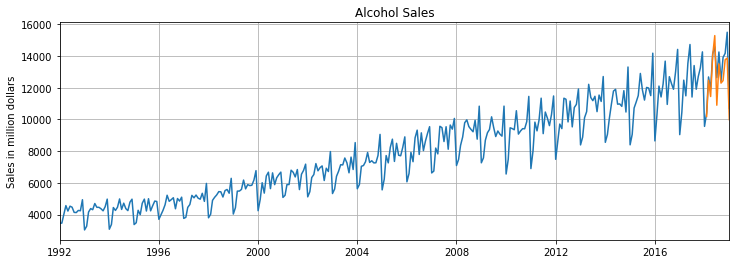

In [46]:
plt.figure(figsize=(12,4))
plt.title('Alcohol Sales')
plt.ylabel('Sales in million dollars')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions)
plt.show()

## Zooming in the prediction region

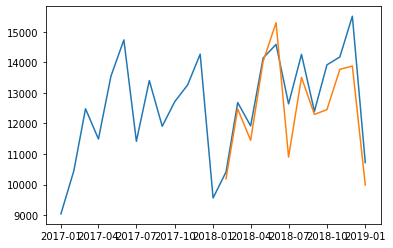

In [47]:
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions)
plt.show()

## Training all data set to forecast unknown future

In [48]:
epochs = 100

model.train()

#feature scale for entire dataset
y_norm = scaler.fit_transform(y.reshape(-1,1))
y_norm = torch.FloatTensor(y_norm).view(-1)
all_data = input_data(y_norm,window_size)

import time
start_time = time.time()

for i in range(epochs):

  for seq,y_train in train_data:

    optimizer.zero_grad()

    model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))

    y_pred = model(seq)

    loss = criterion(y_pred,y_train)
    loss.backward()
    optimizer.step()

  print('Epoch: {} Loss: {}'.format(i,loss))

total_time = time.time() - start_time
print(total_time/60)

Epoch: 0 Loss: 7.681459828745574e-05
Epoch: 1 Loss: 1.1015778909495566e-05
Epoch: 2 Loss: 0.0004181764379609376
Epoch: 3 Loss: 0.0024578070733696222
Epoch: 4 Loss: 0.0027614831924438477
Epoch: 5 Loss: 0.0002967418695334345
Epoch: 6 Loss: 0.0015784602146595716
Epoch: 7 Loss: 0.0004863635404035449
Epoch: 8 Loss: 0.0005388823919929564
Epoch: 9 Loss: 0.0001273774541914463
Epoch: 10 Loss: 0.0005202466854825616
Epoch: 11 Loss: 0.000491894839797169
Epoch: 12 Loss: 0.0004941228544339538
Epoch: 13 Loss: 0.0006439473945647478
Epoch: 14 Loss: 0.0005590637447312474
Epoch: 15 Loss: 0.0003618935588747263
Epoch: 16 Loss: 0.00044798461021855474
Epoch: 17 Loss: 0.0006063045584596694
Epoch: 18 Loss: 0.00046453639515675604
Epoch: 19 Loss: 0.0003648641868494451
Epoch: 20 Loss: 0.0007276521646417677
Epoch: 21 Loss: 0.00022850152163300663
Epoch: 22 Loss: 0.0006196566391736269
Epoch: 23 Loss: 0.0003138428437523544
Epoch: 24 Loss: 0.0008733148570172489
Epoch: 25 Loss: 0.0002084940206259489
Epoch: 26 Loss: 6.4

In [51]:
window_size = 12 

future = 12
L = len(y)

preds = y_norm[-window_size:].tolist()

model.eval()

for i in range(future):

  seq = torch.FloatTensor(preds[-window_size:])

  with torch.no_grad():

    model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))

    preds.append(model(seq).item())

  

In [52]:
true_predictions = scaler.inverse_transform(np.array(preds).reshape(-1,1))

In [53]:
true_predictions

array([[10415.00001808],
       [12683.00013363],
       [11919.00006013],
       [14137.99993426],
       [14583.00009555],
       [12640.00017402],
       [14257.00005591],
       [12395.9999277 ],
       [13913.99994579],
       [14173.99995232],
       [15504.        ],
       [10717.99998423],
       [11297.08939561],
       [13039.53695831],
       [12757.66357484],
       [14366.12123078],
       [14907.61955088],
       [12536.21696106],
       [13868.87372279],
       [12572.71917874],
       [13411.92336655],
       [13775.0058856 ],
       [14544.34299171],
       [10505.15293488]])

## Visualization

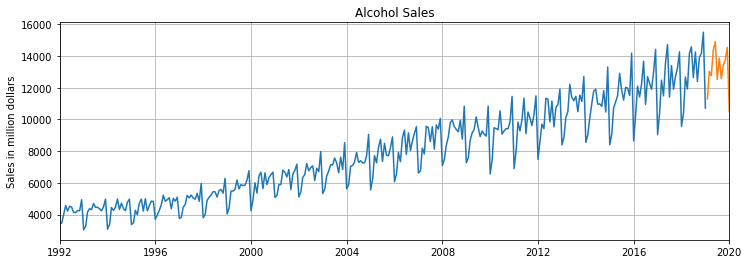

In [57]:
x = np.arange('2019-02-01','2020-02-01', dtype='datetime64[M]').astype('datetime64[D]')
plt.figure(figsize=(12,4))
plt.title('Alcohol Sales')
plt.ylabel('Sales in million dollars')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions[window_size:])
plt.show()

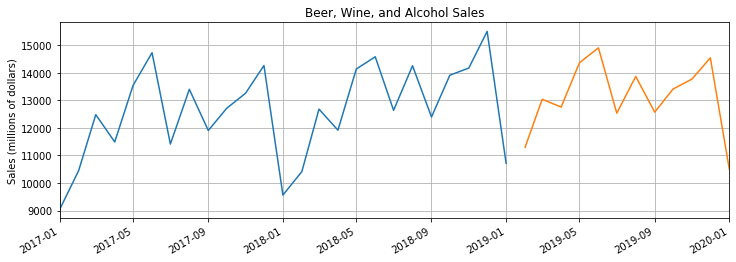

In [58]:
fig = plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions[window_size:])
plt.show()